In [50]:
import os,sys
from pathlib import Path
#import pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = Path("new_media/Radiographs/BoxTurtleNormal/DICOM/DICOMDIR")
#print(os.listdir(path))
print(path.is_file())
##file = get_testdata_file("new_media/Radiographs/Box Turtle Normal/DICOM/DICOMDIR")
print(file)
ds = dcmread(path)
#print(dir(pydicom.filereader.DicomDir))
#fs = pydicom.filereader.DicomDir(path)python
print(ds.DirectoryRecordSequence)

True
None
[(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 516
(0004, 1430) Directory Record Type               CS: 'PATIENT'
(0010, 0010) Patient's Name                      PN: 'Box Turtle'
(0010, 0020) Patient ID                          LO: 'Bturtle'
(0010, 0030) Patient's Birth Date                DA: '20170622'
(0010, 0040) Patient's Sex                       CS: 'F'(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 686
(0004, 1430) Directory Record Type               CS: 'STUDY'
(0008, 0020) Study Date                          DA: '20190111'
(0008, 0030) Study Time                          TM: '130915.000000'
(0008, 0050) Accession Number                    SH: '341950'
(0008, 1030) Study Description                   LO: 'ABDOMEN'
(0020, 000d) Stu

Pregnant Guinea Pig Radiographs
j_path is new_media/Radiographs/Pregnant Guinea Pig Radiographs/DICOM
Guinea Pig /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Pregnant Guinea Pig Radiographs/DICOM/I1
Not a .dcm file


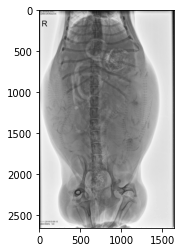

exports
j_path is new_media/Radiographs/exports/DICOM
j_path of new_media/Radiographs/exports/DICOM did not exist: File or folder 'new_media/Radiographs/exports/DICOM' does not exist
Couldn't find DICOMDIR for exports
Normal monitor lizard
j_path is new_media/Radiographs/Normal monitor lizard/DICOM
Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I0
Not a .dcm file


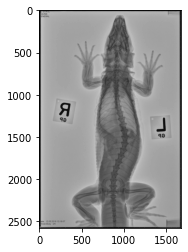

Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I1
Not a .dcm file


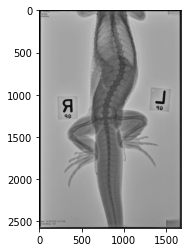

Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I2
Not a .dcm file


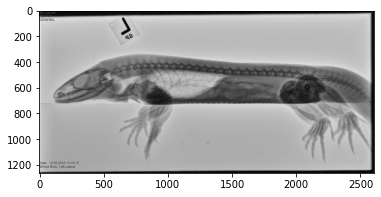

Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I3
Not a .dcm file


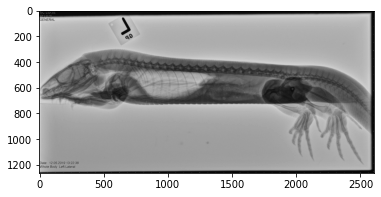

Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I4
Not a .dcm file


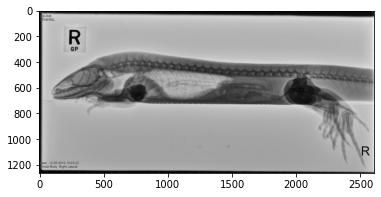

Normal Monitor lizard /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Normal monitor lizard/DICOM/I5
Not a .dcm file


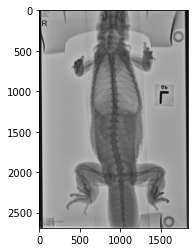

Bearded Dragon Fracture Radiographs
j_path is new_media/Radiographs/Bearded Dragon Fracture Radiographs/DICOM
Bearded Dragon /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Bearded Dragon Fracture Radiographs/DICOM/I0
Not a .dcm file


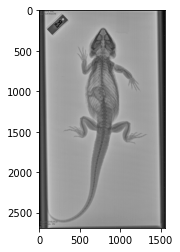

Bearded Dragon /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Bearded Dragon Fracture Radiographs/DICOM/I1
Not a .dcm file


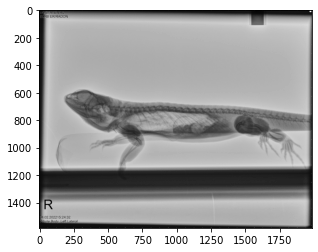

Bearded Dragon /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Bearded Dragon Fracture Radiographs/DICOM/I2
Not a .dcm file


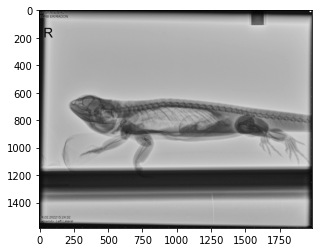

Box Turtle Normal
j_path is new_media/Radiographs/Box Turtle Normal/DICOM
Box Turtle /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Box Turtle Normal/DICOM/I0
Not a .dcm file


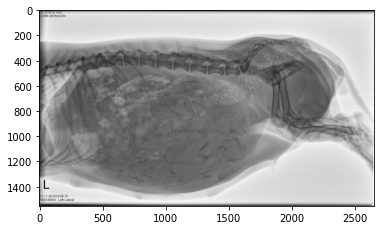

Box Turtle /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Box Turtle Normal/DICOM/I1
Not a .dcm file


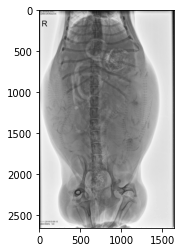

Pregnant Goat Radiographs
j_path is new_media/Radiographs/Pregnant Goat Radiographs/DICOM
Goat Radiographs /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Pregnant Goat Radiographs/DICOM/I0
Not a .dcm file


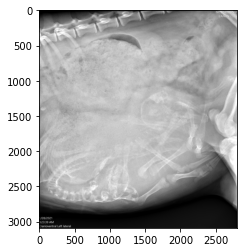

Goat Radiographs /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Pregnant Goat Radiographs/DICOM/I1
Not a .dcm file


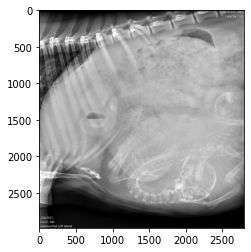

Goat Radiographs /home/exhibits/GitHub/VetRFID/new_media/Radiographs/Pregnant Goat Radiographs/DICOM/I2
Not a .dcm file


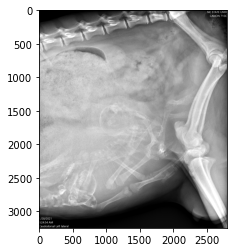

In [8]:
import os,sys
import matplotlib.pyplot as plt
import dicom2jpg
from pathlib import Path
from pydicom import dcmread
from pydicom.fileset import FileSet
base_path = Path("new_media/Radiographs/")
for directory in os.listdir(base_path):
    #path = Path("new_media/Radiographs/BoxTurtleNormal/DICOM/DICOMDIR")
    print(directory)
    dicomdir_path = Path(os.path.join(base_path, directory, "DICOMDIR"))
    if not dicomdir_path.is_file():
        dicomdir_path = os.path.join(base_path, directory, "DICOM/DICOMDIR")
    try:
        j_path = os.path.join(base_path, directory, "DICOM")
        print(f"j_path is {j_path}")
        try:
            dicom2jpg.dicom2png(j_path, target_root="new_media/Radiographs/exports/", multiprocessing=False, anonymous=False)
        except OSError as e:
            print(f"j_path of {j_path} did not exist: {e}")
        ds = dcmread(dicomdir_path)
        #print(ds.DirectoryRecordSequence)
        fs = FileSet(ds)
        #print(ds.DirectoryRecordSequence)
        #print(fs)
        for instance in fs:
            print(instance.PatientName, instance.path)
            dicom2jpg.dicom2png(instance.path, target_root="new_media/Radiographs/exports/")
            ds = instance.load()
            #print(ds.pixel_array)
            #plt.imsave(ds.pixel_array, f"{str(instance.PatientName).strip()}{str(ds.pixel_array.shape).strip()}.png", cmap=plt.cm.gray)
            plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
            plt.show()
    except FileNotFoundError as e:
        print(f"Couldn't find DICOMDIR for {directory}")